To start the Assigment 3, we will first import the libraries that we will use in this assignment. 

In [253]:
import random
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import math

Question 1: A simulation model is used to estimate the steady state average waiting time
of passengers in a new airport to be opened. In the attached file, the individual waiting time
of passengers recorded during 21 replications are given 

We firstly load the data.

In [254]:
with open("q1-table.csv", "r") as f:
    data = f.readlines()

Then, we need to initialize our variables, then load the replications

In [255]:
replications = dict()
for i in range(1, 22):
    replications[i] = []
for line in data:
    line   = line.strip().split(";")
    line   = line[1:]
    for i in range(len(line)):
        word = line[i]
        if word != "" and word != None :
            replications[i+1].append(float(word.replace(",", ".")))

a. Analyze the length of the warm-up period using moving average on replication 1, 5
and 12....

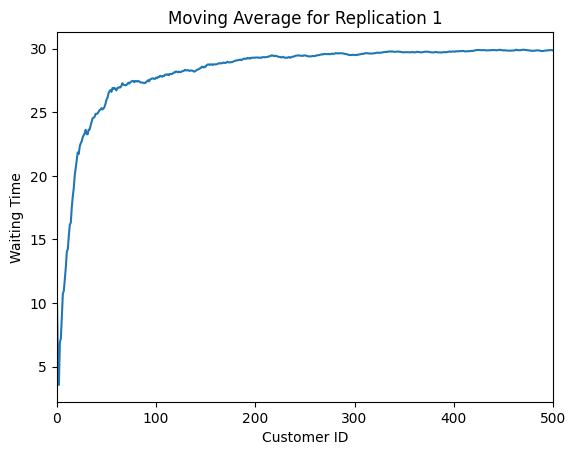

In [256]:
moving_average_for_rep_1 = []
for i in range(1, len(replications[1])):
    moving_average_for_rep_1.append(sum(replications[1][:i])/i)

plt.plot(moving_average_for_rep_1)
plt.title("Moving Average for Replication 1")
plt.xlabel("Customer ID")
plt.ylabel("Waiting Time")
plt.xlim(0, 500)
plt.show() 


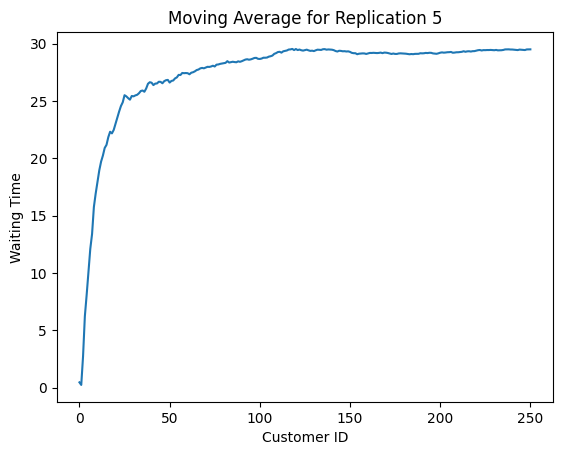

In [257]:

moving_average_for_rep_5 = []
for i in range(1, len(replications[5])):
    moving_average_for_rep_5.append(sum(replications[5][:i])/i)

plt.plot(moving_average_for_rep_5)
plt.title("Moving Average for Replication 5")
plt.xlabel("Customer ID")
plt.ylabel("Waiting Time")
plt.show() 


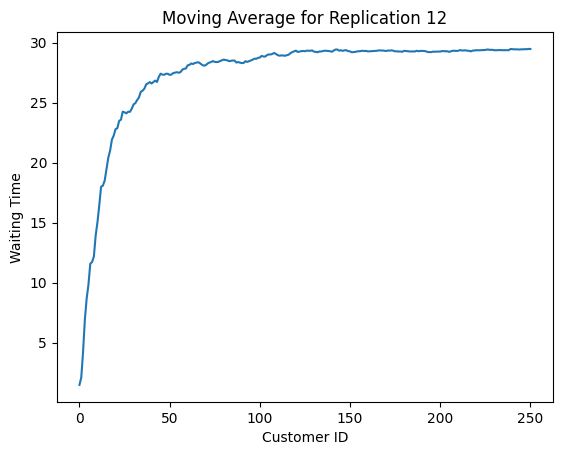

In [258]:

moving_average_for_rep_12 = []
for i in range(1, len(replications[12])):
    moving_average_for_rep_12.append(sum(replications[12][:i])/i)
plt.plot(moving_average_for_rep_12)
plt.title("Moving Average for Replication 12")
plt.xlabel("Customer ID")
plt.ylabel("Waiting Time")
plt.show() 


So, let's show the results of the warm-up period together.

For rep1, the warm-up period finishes on the customer ~(100-150),
For rep2, the warm-up period finishes on the customer ~(50-100),
For rep3, the warm-up period finishes on the customer ~(50-100).

Normally, I want to use the time to take warm up, not the number of customers. I mean I need a time to specify the warm-up time, but in this case i need to talk about customers. However, I will use the number of customers for this assignment since I can not calculate that time from the waiting time data. From these results I do not know which one to use. I may use the average of these three results as the warm-up period, but let's see what we encounter on the next steps. So, the warm-up period is 50-150 customers.

PS: If I know the time information of these replications( the time spent trought the simulation), everything would be easier.

a) ...Alternatively, analyze the length of the warm-up period using ensemble
averages. ...

First of all, sine the first rep is about 1500 customers while the others are 250 in average. The results are not easy readble because of the first rep. Let's see with first and witoout first rep.

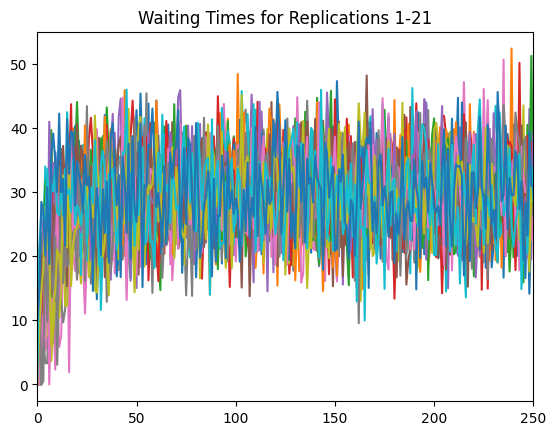

In [259]:
for i in range(1,22):
    plt.plot(replications[i], label="Replication " + str(i))
plt.title("Waiting Times for Replications 1-21")
plt.xlim(0, 250)
plt.show()


Let's show the results of the warm-up period together.

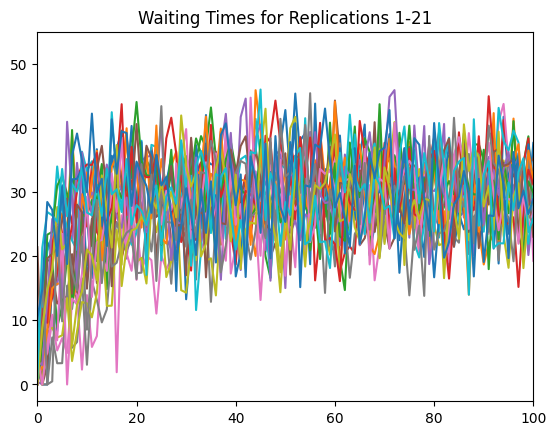

In [260]:
for i in range(1,22):
    plt.plot(replications[i], label="Replication " + str(i))
plt.title("Waiting Times for Replications 1-21")
plt.xlim(0, 100)
plt.show()


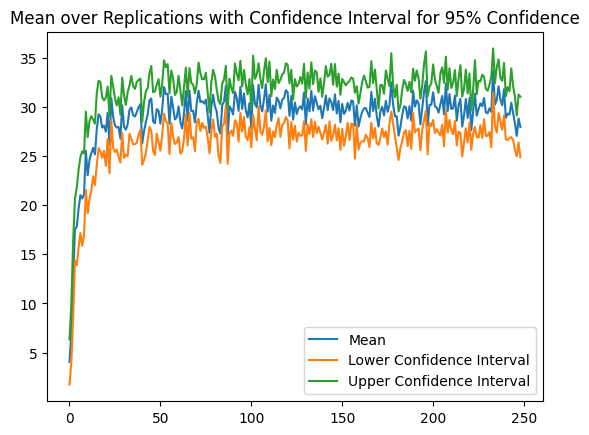

In [261]:
# Plot data to graph mean over replications with confidence interval for 95% confidence
from scipy import stats

lower_confidence_interval = []
upper_confidence_interval = []
mean = []
for i in range(0, 249):
    t = stats.t.ppf(1 - 0.025, 20)
    a_list = []
    for j in range(1, 22):
        a_list.append(replications[j][i])
    mean.append(np.mean(a_list))
    lower_confidence_interval.append(mean[i] - t * np.std(a_list)/math.sqrt(len(a_list)))
    upper_confidence_interval.append(mean[i] + t * np.std(a_list)/math.sqrt(len(a_list)))

plt.plot(mean, label="Mean")
plt.plot(lower_confidence_interval, label="Lower Confidence Interval")
plt.plot(upper_confidence_interval, label="Upper Confidence Interval")
plt.title("Mean over Replications with Confidence Interval for 95% Confidence")
plt.legend()
plt.show()


a) ...Compare your findings, and decide on the warm-up period length to be
used for the rest of the analysis.

From the first part of the question, I was thinking to use the average of the results of the moving average and I would use the average of the results, but with the second part of the question, I decided to use the results of the ensemble averages also, which is 50. So, I will use 50 customers as the warm-up period since I cannot infer any time-like-information from the data.

b) One of the replications is much longer than the others (Replication no 1). Just using
that run, build a 95% confidence interval for the average waiting time of customers

In [262]:
replication1 = replications[1]
t = stats.t.ppf(1 - 0.025, len(replication1)-1)
exp = t * np.std(replication1)/math.sqrt(len(replication1))
lower_confidence_interval = mean - exp
upper_confidence_interval = mean + exp
print("Confidence interval for replication 1: [", lower_confidence_interval, ",", upper_confidence_interval, "]")

Confidence interval for replication 1: [ [ 3.7258117   6.55717524 12.04568984 17.22173016 17.51357651 19.32740162
 20.71489972 20.36238776 20.79861249 25.22864333 22.74466427 24.27933097
 24.96175581 25.52352206 24.86128034 27.41113266 28.93468159 28.70966675
 27.58907487 27.78477549 27.17193423 29.10285036 25.84661725 30.59472344
 28.69908699 27.8304624  27.59453016 27.65599676 26.46779022 29.86520046
 27.68786527 27.37284814 27.93862191 29.4043699  29.65209735 28.84724326
 28.71480743 29.14412815 29.65796572 29.97776289 25.99466753 27.21517615
 28.15476834 28.91902249 30.385185   30.55480529 28.19894406 28.03749207
 29.46613815 29.29946084 27.98866945 29.45681209 31.72578528 31.00114857
 31.02140935 27.99102356 30.7353984  29.63484133 28.41635794 28.65338192
 29.7430345  28.15397956 27.50692597 29.08114895 31.30060167 28.26360085
 31.35831396 29.28871141 29.29005324 28.13006348 30.07842638 31.34054898
 30.18549487 30.28789676 30.03513615 30.43650371 28.88896364 27.05866046
 29.682154

If I am told to discard the warm-up period, I would cut the first 200 observations(from the first graph in a)). 

In [263]:
replication1 = replications[1][200:]
t = stats.t.ppf(1 - 0.025, len(replication1)-1)
exp = t * np.std(replication1)/math.sqrt(len(replication1))
lower_confidence_interval = mean - exp
upper_confidence_interval = mean + exp
print("Confidence interval for replication 1: [", lower_confidence_interval, ",", upper_confidence_interval, "]")

Confidence interval for replication 1: [ [ 3.7141008   6.54546434 12.03397894 17.21001926 17.50186561 19.31569072
 20.70318882 20.35067686 20.78690159 25.21693243 22.73295337 24.26762007
 24.95004491 25.51181116 24.84956944 27.39942176 28.92297069 28.69795584
 27.57736397 27.77306459 27.16022333 29.09113946 25.83490635 30.58301254
 28.68737609 27.8187515  27.58281926 27.64428586 26.45607932 29.85348956
 27.67615437 27.36113724 27.92691101 29.392659   29.64038644 28.83553236
 28.70309653 29.13241724 29.64625482 29.96605199 25.98295663 27.20346524
 28.14305743 28.90731159 30.3734741  30.54309439 28.18723316 28.02578117
 29.45442725 29.28774993 27.97695854 29.44510119 31.71407438 30.98943767
 31.00969845 27.97931266 30.7236875  29.62313042 28.40464703 28.64167102
 29.7313236  28.14226866 27.49521507 29.06943805 31.28889077 28.25188995
 31.34660306 29.27700051 29.27834233 28.11835258 30.06671548 31.32883808
 30.17378397 30.27618586 30.02342525 30.42479281 28.87725273 27.04694956
 29.670443

c) Use all replications to construct a 95% confidence interval for the average waiting
time of customers

In [264]:
means = []
for rep in replications.values():
    means.append(np.mean(rep))
mean = np.mean(means)
std  = np.std(means)
t = stats.t.ppf(1 - 0.025, 20)
H = t * std/math.sqrt(len(means))
lower_confidence_interval = mean - H
upper_confidence_interval = mean + H
print("Confidence interval for replication 1: [", lower_confidence_interval, ",", upper_confidence_interval, "]")



Confidence interval for replication 1: [ 28.885938239390274 , 29.530459626113352 ]


If I am told to discard the warm-up period, I would cut the first 100 observations(from the first graph in a)).

In [265]:
means = []
for rep in replications.values():
    means.append(np.mean(rep[50:]))
mean = np.mean(means)
std  = np.std(means)
t = stats.t.ppf(1 - 0.025, 20)
H = t * std/math.sqrt(len(means))
lower_confidence_interval = mean - H
upper_confidence_interval = mean + H
print("Confidence interval for replication 1: [", lower_confidence_interval, ",", upper_confidence_interval, "]")



Confidence interval for replication 1: [ 29.84473788554107 , 30.090516005998243 ]


As you see, when I cut the warm-up period, the waiting time increases and the confidence interval becomes more confident. So, we can go with the cutted data, which is 50 as the warm-up period.

d) Compare your point estimates as well as the confidence intervals you constructed in
(b) and (c). Discuss the reliability, precision, and potential bias in these estimates.

First of all, the main problem is time as I mentioned before. I do not know the time information of the replications. So, I cannot say anything about the reliability of the results. We are talking about the number of the customers, not the time. The correct warm-up period should have been like "after 20 minutes" or "after 1 hour", not "after 50 customers". However, I do not think this data is all useless, instead we can infer some information from that, of course. If we accept this time problem, we can start to talk about the reliability of the results.
The confidence intervals I created on b) and c) are not far from each other. However, while comparing these we need to take the warm-up period thing into account. If we discard the warm-up period both:

b) without warm-up period : [ 29.64341371321471 ,  30.291840178324602 ], diff = 0.648426465109892
c) without warm-up period : [ 29.84473788554107  , 30.090516005998243 ], diff = 0.245778120457173

As you see, c) is more confident than b) we can say it is more realible, but, as I said before, when it comes to if we find correct point estimates, I would say if we were talking about time instead of number of customers, we would have found more reliable results. 

b) with warm-up period : [ 29.655124614633117 , 30.280129276906194 ], diff = 0.625004662273077
c) with warm-up period : [ 28.885938239390274 , 29.530459626113352 ], diff = 0.644521386723078
As you see, in the b) part warm-up period does not affect the results so much since the data is long enough that the biased data could not affect at all. However, in the c) part, the warm-up period affects the results so much since the data is not long enough that the biased data affects the results. So, we can say that the warm-up period affects the results so much when the data is not long enough. 

Additionally, when we discard the warm-up period the waiting time becomes more confident with a little bit higher waiting time.
Whay it means is that since the warm-up starts from idle, it really affects the waiting time in a increasing way. When it comes to potential bias, I have some doubts about the simulation inputs. I mean, I do not know if the simulation inputs are given correctly or the random numbers are generated correctly. These questionables may cause potential bias in the results. Also, the starting time of the simulation may cause potential bias in the results. I mean, if the simulation starts at 8 am, the results may be different than the simulation starts at 9 am. So, the simulation inputs, like starting settings, and the starting time of the simulation may cause potential bias in the results.

Also, all the replications consist of more than 30 customers, so we can say that the number of the oberservations is enough to perform the related steps on t-distribution.

Question 2: A model is used to compare two alternative patient-MR machine scheduling
approaches with respect to the average waiting time of patients at the radiology clinic of a
hospital

Let's read and load the data as we did in the first question.

In [266]:
with open("q2-table.csv", "r") as f:
    data = f.readlines()
independent = {1:[],2:[]}
correlated  = {1:[],2:[]}
for line in data:
    line   = line.strip().split(";")
    independent[1].append(float(line[1].replace(",", ".")) )  
    if line[2] != "" and line[2] != None:
        independent[2].append(float(line[2].replace(",", ".")))
    correlated[1].append(float(line[6].replace(",", ".")))
    correlated[2].append(float(line[7].replace(",", ".")))

a) The first alternative is run 30 times, and the second alternative is simulated 28 times
using independent random number streams. Build a 95% confidence interval for the
expected difference in the waiting times between these two alternatives. Can you
draw a strong conclusion?

In [267]:
mean1 = np.mean(independent[1]) # alt1
mean2 = np.mean(independent[2]) # alt2
var1  = np.var(independent[1])
var2  = np.var(independent[2])
len1  = len(independent[1])
len2  = len(independent[2])
point_estimater = "Alt1 - Alt2"
O = mean1 - mean2
std = math.sqrt(var1/len1+ var2/len2)
df = (var1/len1 + var2/len2) / ((var1/len1)**2/(len1-1) + (var2/len2)**2/(len2-1))
t = stats.t.ppf(1 - 0.025, df)
H = t * std
lower_confidence_interval = O - H
upper_confidence_interval = O + H
print("Confidence interval for independent: [", lower_confidence_interval, ",", upper_confidence_interval, "]")
print(lower_confidence_interval," < Alt1 - Alt2 < ", upper_confidence_interval)

Confidence interval for independent: [ -2.4489951520865523 , 0.15341505732464267 ]
-2.4489951520865523  < Alt1 - Alt2 <  0.15341505732464267


Confidence interval for independent: [ -2.4489951520865523 , 0.15341505732464267 ]
-2.4489951520865523  < Alt1 - Alt2 <  0.15341505732464267

Pozitive difference means Alt2 is better than Alt1. 
Negative difference means Alt1 is better than Alt2.

Since the confidence interval contains 0, we cannot draw a strong conclusion. We can say that there is no difference between the two alternatives. Since the interval is most likely in negative region, it seems like the first alternative is better than the second one, but we cannot say that with a strong conclusion.

b) Later, the model is carefully redesigned and both alternatives are simulated using
correlated random number streams using 30 random number seeds. Build a 95%
confidence interval for the expected difference in the waiting times between these
two alternatives. Can you draw a strong conclusion?

In [268]:
mean1 = np.mean(correlated[1]) # alt1
mean2 = np.mean(correlated[2]) # alt2
var1  = np.var(correlated[1])
var2  = np.var(correlated[2])
len1  = len(correlated[1])
len2  = len(correlated[2])

dif = [] # alt1 - alt2
for i in range(len1):
    dif.append(correlated[1][i] - correlated[2][i])
mean = np.mean(dif)
std  = np.std(dif)
stderror = std/math.sqrt(len1)
O = mean
H = stats.t.ppf(1 - 0.025, len1-1) * stderror
lower_confidence_interval = O - H
upper_confidence_interval = O + H
print("Confidence interval for correlated: [", lower_confidence_interval, ",", upper_confidence_interval, "]")
print(lower_confidence_interval," < Mean < ", upper_confidence_interval)

Confidence interval for correlated: [ -2.156512797456072 , -1.4115495235821 ]
-2.156512797456072  < alt1 - alt2 <  -1.4115495235821

Pozitive difference means Alt2 is better than Alt1. 
Negative difference means Alt1 is better than Alt2.

Since the confidence interval does not contain 0, we can draw a strong conclusion.  Since the interval is most likely in negative region, it seems like the first alternative is better than the second one and we can say this with a strong conclusion since the whole interval is in negative region.

c) Compare your point estimates as well as the confidence intervals you constructed in
(a) and (b). Discuss the reliability, precision, and potential bias in these estimates.

First of all, like in the first question, all the replications consist of more than 30 customers, so we can say that the number of the oberservations is enough to perform the related steps on t-distribution. Then, as I said in the first question, we do not know anythin about how they start the simulations and with which settings, so there can be biased conclusions because of these reasons. 
Let's compare the results. When we use the independent random number streams, we cannot get any strong conclusion, since the result had 0 in the confidence interval. Actually, it makes sense, when you compare two alternatives, you need to use the same random number streams, otherwise, you cannot compare the different setups. You cannot get the real cause of the difference, the real change in the system may cause that diffrence or the random numbers they use. For the correlated random number streams, we can get a strong conclusion, since the result did not have 0 in the confidence interval. So, we can say that the first alternative is better than the second one since the whole interval was in the negative region.